In [4]:
import numpy as np
import pandas as pd
import os

In [25]:
df = pd.read_csv(r"C:\Users\Zeesh\Downloads\archive (3)\ai_job_market_insights.csv")
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [26]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [27]:
# Check for NaN values in the specified columns
# Also, defined the columns we are interested in 
columns_to_check = ["Job_Title", "Industry", "Company_Size", "Location", 
                    "AI_Adoption_Level", "Automation_Risk", 
                    "Required_Skills", "Remote_Friendly", "Job_Growth_Projection"]
nan_values = df[columns_to_check].isnull().sum()

nan_values

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [29]:
df_encoded = pd.get_dummies(df, columns = columns_to_check, drop_first = True)
df_encoded.head()

,Salary_USD,Job_Title_Cybersecurity Analyst,Job_Title_Data Scientist,Job_Title_HR Manager,Job_Title_Marketing Specialist,Job_Title_Operations Manager,Job_Title_Product Manager,Job_Title_Sales Manager,Job_Title_Software Engineer,Job_Title_UX Designer,...,Required_Skills_JavaScript,Required_Skills_Machine Learning,Required_Skills_Marketing,Required_Skills_Project Management,Required_Skills_Python,Required_Skills_Sales,Required_Skills_UX/UI Design,Remote_Friendly_Yes,Job_Growth_Projection_Growth,Job_Growth_Projection_Stable
0,111392.165243,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,93792.562466,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,107170.263069,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
3,93027.953758,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,87752.922171,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [30]:
df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


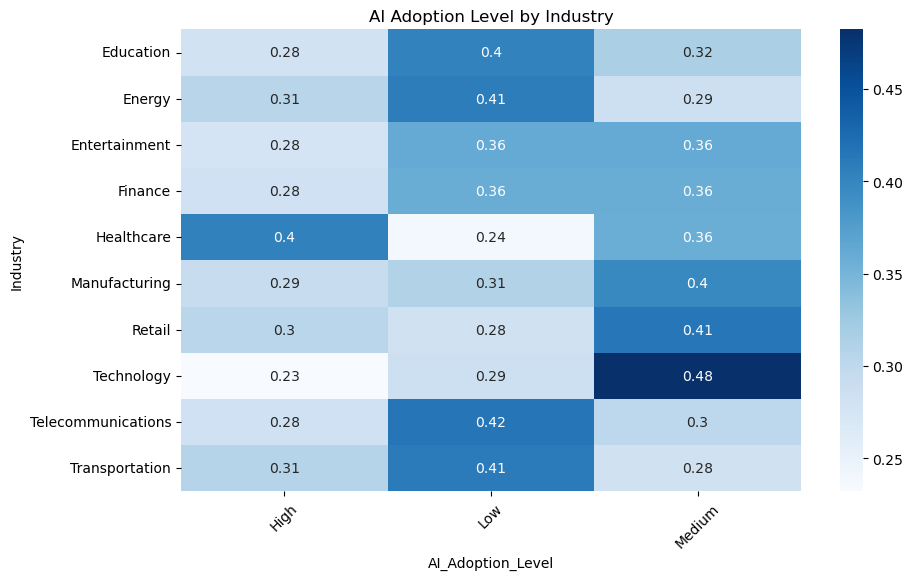

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
ai_adoption_by_industry = df.groupby('Industry')['AI_Adoption_Level'].value_counts(normalize = True).unstack()

plt.figure(figsize = (10,6))
sns.heatmap(ai_adoption_by_industry, annot=True, cmap = 'Blues')
plt.title("AI Adoption Level by Industry")
plt.xticks(rotation =45)
plt.show()




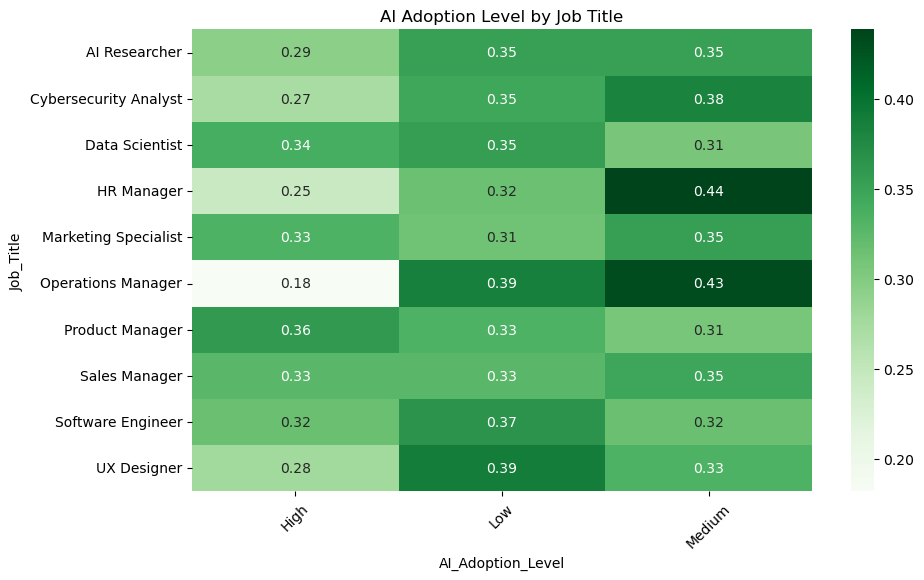

In [43]:
ai_adoption_by_job_title = df.groupby('Job_Title')['AI_Adoption_Level'].value_counts(normalize = True).unstack()

plt.figure(figsize = (10,6))
sns.heatmap(ai_adoption_by_job_title, annot=True, cmap = 'Greens')
plt.title("AI Adoption Level by Job Title")
plt.xticks(rotation =45)
plt.show()


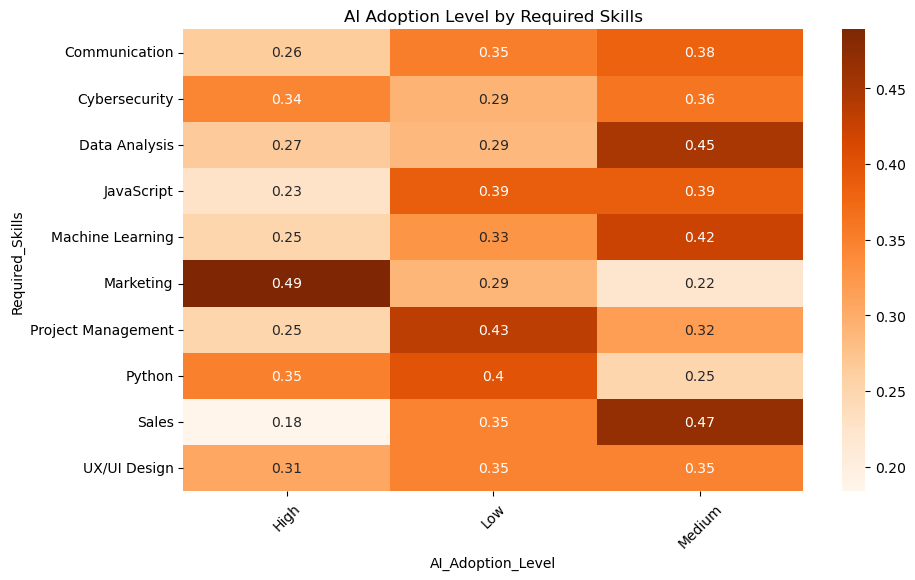

In [45]:
ai_adoption_by_skill = df.groupby('Required_Skills')['AI_Adoption_Level'].value_counts(normalize = True).unstack()

plt.figure(figsize = (10,6))
sns.heatmap(ai_adoption_by_skill, annot=True, cmap = 'Oranges')
plt.title("AI Adoption Level by Required Skills")
plt.xticks(rotation =45)
plt.show()


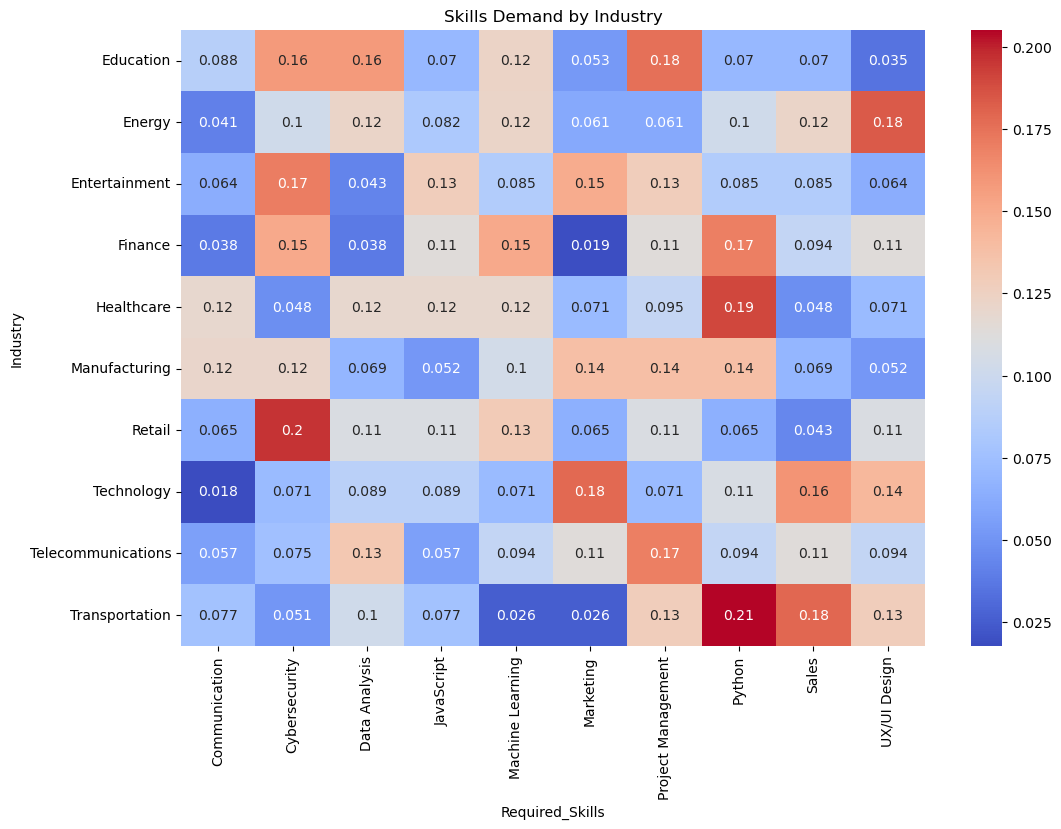

In [46]:
ai_adoption_by_industry = df.groupby('Industry')['Required_Skills'].value_counts(normalize = True).unstack()

plt.figure(figsize = (12,8))
sns.heatmap(ai_adoption_by_industry, annot=True, cmap = 'coolwarm')
plt.title("Skills Demand by Industry")
plt.xticks(rotation =90)
plt.show()


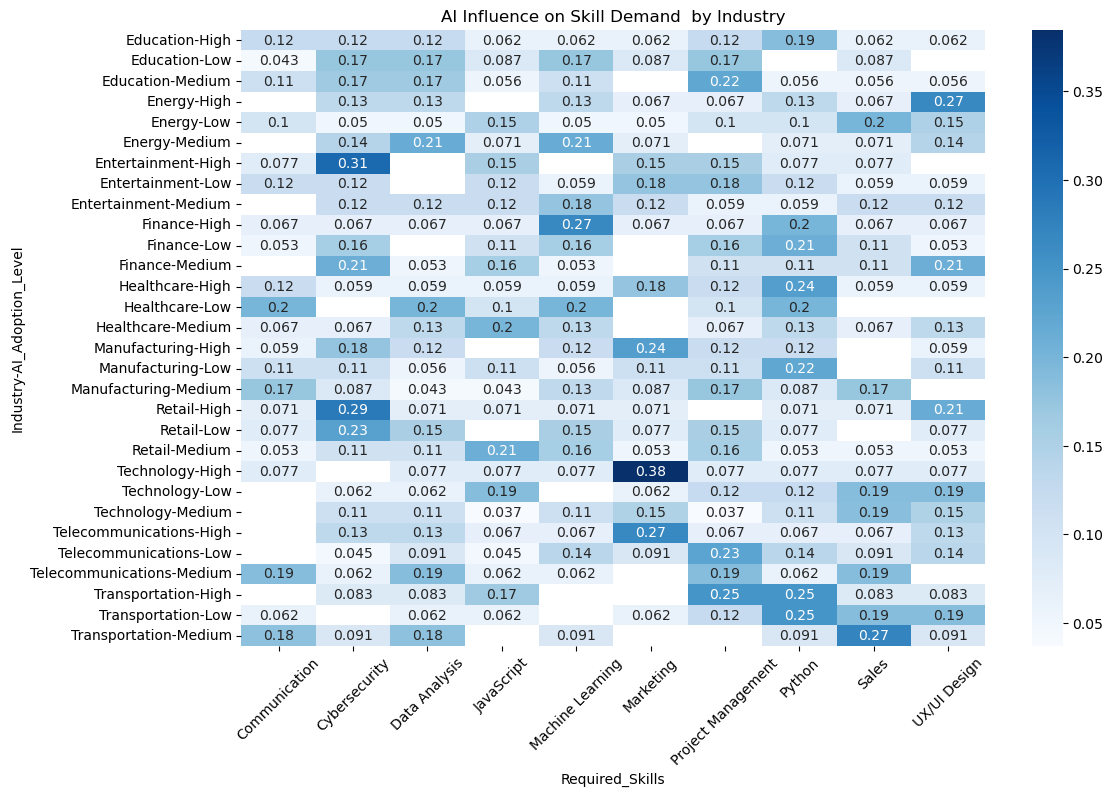

In [50]:
ai_influence_by_industry = df.groupby(['Industry','AI_Adoption_Level'])['Required_Skills'].value_counts(normalize = True).unstack()

plt.figure(figsize = (12,8))
sns.heatmap(ai_influence_by_industry, annot=True, cmap = 'Blues')
plt.title("AI Influence on Skill Demand  by Industry")
plt.xticks(rotation =45)
plt.show()


In [51]:
df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [52]:
high_auto_risk = df[df['Automation_Risk'] == 'High']
high_auto_risk

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
6,HR Manager,Finance,Medium,Singapore,Low,High,Sales,102065.720673,Yes,Growth
...,...,...,...,...,...,...,...,...,...,...
491,Cybersecurity Analyst,Education,Medium,London,Low,High,Data Analysis,90764.668704,No,Decline
493,Cybersecurity Analyst,Energy,Medium,Berlin,Medium,High,UX/UI Design,79936.875359,No,Decline
494,Sales Manager,Transportation,Medium,Tokyo,Medium,High,Sales,97622.960933,Yes,Growth
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline


In [54]:
risk_by_titles = df.groupby('Job_Title') ['Automation_Risk'].value_counts(normalize = True).unstack()
risk_by_titles

Automation_Risk,High,Low,Medium
Job_Title,,,
AI Researcher,0.392157,0.294118,0.313725
Cybersecurity Analyst,0.418182,0.381818,0.200000
Data Scientist,0.274194,0.403226,0.322581
HR Manager,0.263158,0.280702,0.456140
Marketing Specialist,0.354167,0.208333,0.437500
Operations Manager,0.227273,0.409091,0.363636
Product Manager,0.410256,0.307692,0.282051
Sales Manager,0.408163,0.367347,0.224490
Software Engineer,0.365854,0.317073,0.317073


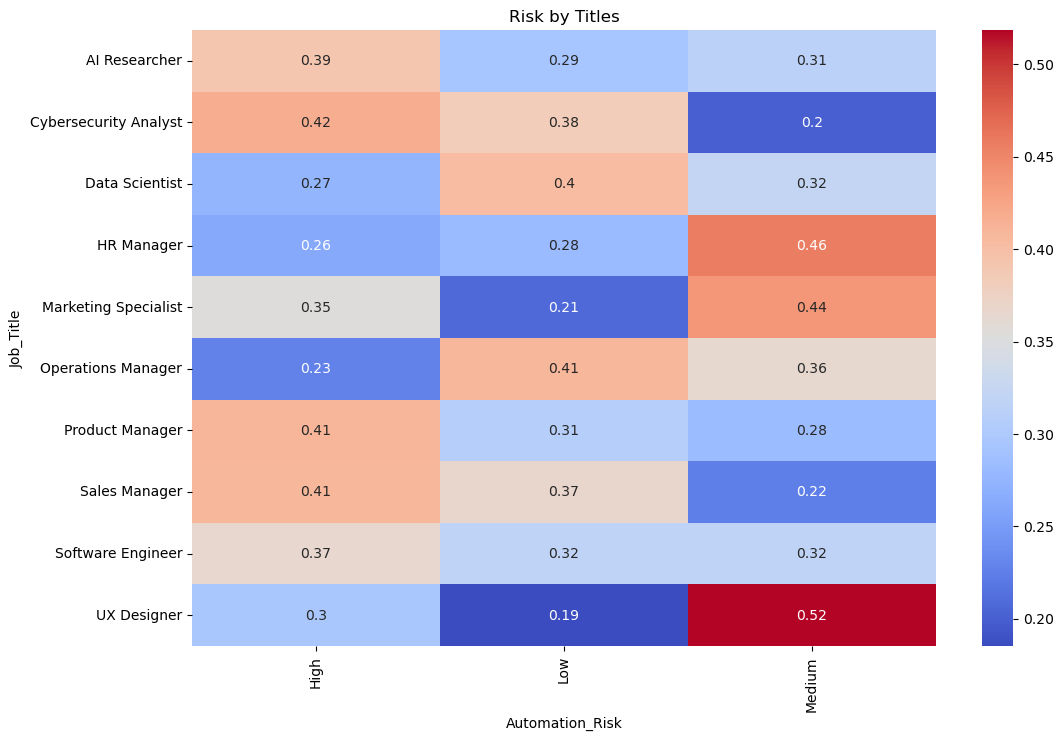

In [57]:
plt.figure(figsize = (12,8))
sns.heatmap(risk_by_titles,annot = True, cmap='coolwarm')
plt.title("Risk by Titles")
plt.xticks(rotation=90)
plt.show()